<a href="https://colab.research.google.com/github/lukasdekanovsky/Become_PythonDeveloper_AI/blob/main/KONVOLUCNI_(CNN)_Rozpozn%C3%A1v%C3%A1n%C3%AD_obr%C3%A1zku_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Základní model konvoluční neuronové sítě pro rozpoznávání obrazu (černobílý)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
# Nahrání trénovacích a testovacích dat ze sady
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# jaký je formát dat? = černobílé
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [ ]:
# jaký je počet pixelů obrázku
print(x_train[0].shape) #28x28
print(x_train.shape) #60 000 dat po 28x28 pixelech
print(x_test.shape) #10 000 dat testovacích

(28, 28)
(60000, 28, 28)
(10000, 28, 28)


6

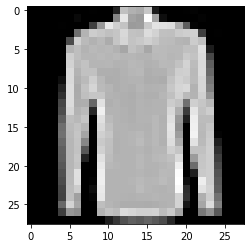

In [ ]:
#zobrazení náhodněho obrázku z dat
plt.imshow(x_train[40], cmap="gray")
y_train[40]

In [ ]:
# kolik máme celkových kategorií
pocet_kategorii = len(set(y_train))
print("Počet kategorií:", pocet_kategorii)

Počet kategorií: 10


In [ ]:
kategorie = '''Tričko
Kalhoty
Pullover
Šaty
Kabát
Sandále
Košile
Botasky
Baťoh
Kotníkové boty'''.split("\n")
kategorie

['Tričko',
 'Kalhoty',
 'Pullover',
 'Šaty',
 'Kabát',
 'Sandále',
 'Košile',
 'Botasky',
 'Baťoh',
 'Kotníkové boty']

In [ ]:
#Datová normalizace
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [ ]:
#Datové předimenzování - (počet obr., pixel X pixel , potřebujeme další parametr a to barva)
print(x_train.shape)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [ ]:
#Tvorba neuronové sítě funkcionálním přístupem
i = Input(shape=x_train[0].shape) #vstupní vrstva

x = Conv2D(32, (3, 3), strides=2, activation='relu')(i) #konvoluční vrstva, 32kerasu čtverečky 3x3 kde probíhá vektorový součin, strides = o kolik pixelů se posouvá
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Flatten()(x)

x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)

x = Dense(pocet_kategorii, activation='softmax')(x)

model = Model(i, x)

In [ ]:
#Modelová kompiace
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Samotné učení neuronové sítě
vysledky = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.5179 - accuracy: 0.8090 - val_loss: 0.3909 - val_accuracy: 0.8517
Epoch 2/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3625 - accuracy: 0.8629 - val_loss: 0.3428 - val_accuracy: 0.8728
Epoch 3/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3143 - accuracy: 0.8803 - val_loss: 0.3276 - val_accuracy: 0.8744
Epoch 4/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2823 - accuracy: 0.8928 - val_loss: 0.2976 - val_accuracy: 0.8950
Epoch 5/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2521 - accuracy: 0.9046 - val_loss: 0.2963 - val_accuracy: 0.8949
Epoch 6/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2316 - accuracy: 0.9104 - val_loss: 0.2857 - val_accuracy: 0.8977
Epoch 7/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2116 - accuracy: 0.9202 - val_loss: 0.2814 -

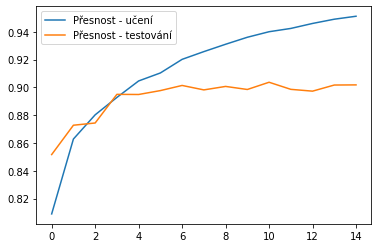

In [ ]:
#vyhodnocení učení
plt.plot(vysledky.history['accuracy'], label='Přesnost - učení')
plt.plot(vysledky.history['val_accuracy'], label='Přesnost - testování')
plt.legend()
#optimálně přesnost testování musí stagnovat, jak začne klesat, je problém, obdobně přesnost učení, pokud stagnuje, neuronka je přeučená


313/313 [==============================] - 3s 8ms/step


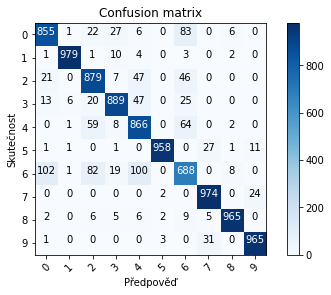

In [ ]:
#Vyhodnocení učení pomocí CONFUSION MAP
from sklearn.metrics import confusion_matrix
import itertools

#funkce, která v hezkém formát vykreslí na obrazovku confusion matrix
def vykresli_confusion_matrix(cm, kategorie):
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(kategorie))
  plt.xticks(tick_marks, kategorie, rotation=45)
  plt.yticks(tick_marks, kategorie)

  fmt = 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('Skutečnost')
  plt.xlabel('Předpověď')
  plt.show()

#vlož testovací data a hádej, co je na obrázku
predikce_test = model.predict(x_test).argmax(axis=1)

#vytvoř confusion matici ze skutečných kategorií a předpovídaných kategorií
cm = confusion_matrix(y_test, predikce_test)

#vykresli confusion matici pro dané kategorie (vyjádřené číslem)
vykresli_confusion_matrix(cm, kategorie=list(range(10)))

Text(0.5, 1.0, 'Skutečnost: Kabát Odhadnuto jako: Košile')

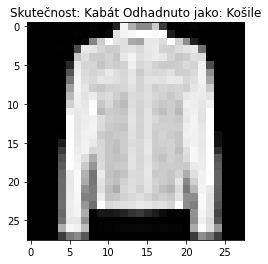

In [ ]:
#Zobrazení špatně odhadnutých - naše posouzení
#Filtrace špatně odhadnutých
indexy_spatne_uhadlych = np.where(predikce_test != y_test)[0]

#Náhodně vybereme špatně odhadnutého
random_index = np.random.choice(indexy_spatne_uhadlych)

#Zobrazíme si ho
plt.imshow(x_test[random_index].reshape(28,28), cmap='gray')
plt.title(f"Skutečnost: {kategorie[y_test[random_index]]} Odhadnuto jako: {kategorie[predikce_test[random_index]]}")